This notebook presents the relationship between the Fourier Series and Fourier Transform.

In [1]:
import sympy
sympy.init_printing()
t = sympy.symbols('t', real=True)
k = sympy.symbols('k', integer=True, real=True)

The Fourier Series is given by:
    
$a_k = \frac{1}{\tau} \int_0^\tau f(t) e^{ik2\pi t/\tau} dt$

$p(t) = \sum\limits_{k=-\infty}^{\infty} a_k e^{-ik2\pi t/\tau}$

If we substitute $a_k$ in the the summation, and then take the limit at $\tau \rightarrow \infty$:

$p(t) = \sum\limits_{k=-\infty}^{\infty} \left[
    \frac{1}{\tau} \int_0^\tau f(t) e^{ik2\pi t/\tau} dt\right]  e^{-ik2\pi t/\tau}$

$p(t) = \sum\limits_{k=-\infty}^{\infty} \left[
    \frac{1}{\tau} \int_0^\tau f(t) e^{ik2\pi t/\tau} dt\right]  e^{-ik2\pi t/\tau}$

$p(t) = \lim\limits_{\tau \rightarrow \infty} \left[ \sum\limits_{k=-\infty}^{\infty} \left[
    \frac{1}{\tau} \int_0^\tau f(t) e^{ik2\pi t/\tau} dt\right]  e^{-ik2\pi t/\tau} \right]$
    
$\Delta\omega \equiv 2\pi/\tau$

$p(t) = \sum\limits_{k=-\infty}^{\infty} \Delta \omega \left[\frac{1}{2\pi}   \int_0^{\infty} f(t) e^{i k\Delta \omega t} dt \right] e^{-ik\Delta \omega t}$

This summation becomes the definition of an integral over $\omega$ where:

$k \Delta\omega \rightarrow \omega$


$\Delta \omega \rightarrow d\omega$

This is the Fourier transform:

$X(\omega) \equiv \frac{1}{2\pi}   \int_0^{\infty} f(t) e^{i\omega t} dt$

This is the inverse Fourier transform:

$p(t) = \int_{-\infty}^{\infty}  X(\omega)  e^{-i \omega t} d\omega$

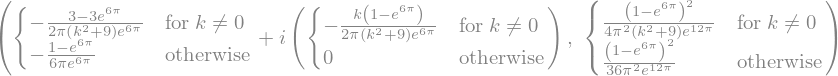

In [2]:
T = 2*sympy.pi
f = sympy.exp(-3*t)*sympy.Heaviside(t)
psik = sympy.exp(-sympy.I*k*2*sympy.pi*t/T)
ak = (1/T)*sympy.integrate(f*sympy.conjugate(psik), (t, 0, T))
real, imag = ak.as_real_imag()
ak = sympy.simplify(real) + sympy.simplify(imag)*sympy.I
p = (real**2 + imag**2).simplify()
ak, p

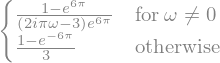

In [3]:
omega = sympy.symbols('omega', real=True)
ak_omega = (T*ak.subs(k, omega*T)).simplify()
ak_omega

In [4]:
f

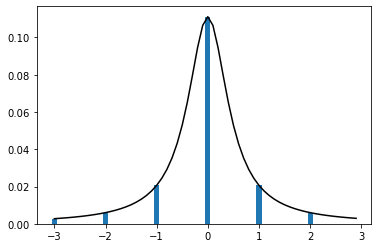

In [5]:
g = sympy.fourier_transform(f, t, omega)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
k_eval = np.arange(-3, 3, 0.1)
k_discr_eval = np.arange(-3, 3, 1)

g_eval = sympy.lambdify((omega), g)(k_eval)
p_eval = sympy.lambdify((omega), ak_omega)(k_discr_eval)

#sympy.plot(sympy.Abs(g)**2, sympy.Abs(ak_omega)**2, (omega, -2, 2))
plt.bar(k_discr_eval, np.abs(p_eval)**2, width=0.1)
plt.plot(k_eval, np.abs(g_eval)**2, 'k')